In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_frames = {
    "numpy": pd.read_csv("../python_numpy/data.csv"),
    "tensorflow_cpu": pd.read_csv("../python_tensorflow/cpu_data.csv"),
    "tensorflow_gpu": pd.read_csv("../python_tensorflow/gpu_data.csv"),
    "golang": pd.read_csv("../go/data.csv"),
    "static_rust": pd.read_csv("../static_rust/data.csv"),
    "dynamic_rust": pd.read_csv("../dynamic_rust/data.csv"),
}

In [19]:
all_data = pd.DataFrame()

for data_frame_name, data_frame in data_frames.items():
    data_frame["implementation"] = data_frame_name
    data_frame["time"] /= 1E9
    data_frame["batchsize"] = data_frame.get("batchsize", 1)
    data_frame["effective_multiplications"] = data_frame["trials"] * data_frame["multiplications"]
    all_data = pd.concat([all_data, data_frame],ignore_index=True)
display(all_data)

,trials,multiplications,threads,time,implementation,batchsize,effective_multiplications
0,10,10,1,0.100247,numpy,1,100
1,10,10,2,0.120096,numpy,1,100
2,10,10,4,0.102394,numpy,1,100
3,10,10,8,0.102069,numpy,1,100
4,10,20,1,0.109662,numpy,1,200
...,...,...,...,...,...,...,...
7079,7000,7000,8,19.418987,dynamic_rust,1,49000000
7080,7000,7000,16,17.828157,dynamic_rust,1,49000000
7081,7000,8000,4,29.310541,dynamic_rust,1,56000000
7082,7000,8000,8,22.419779,dynamic_rust,1,56000000


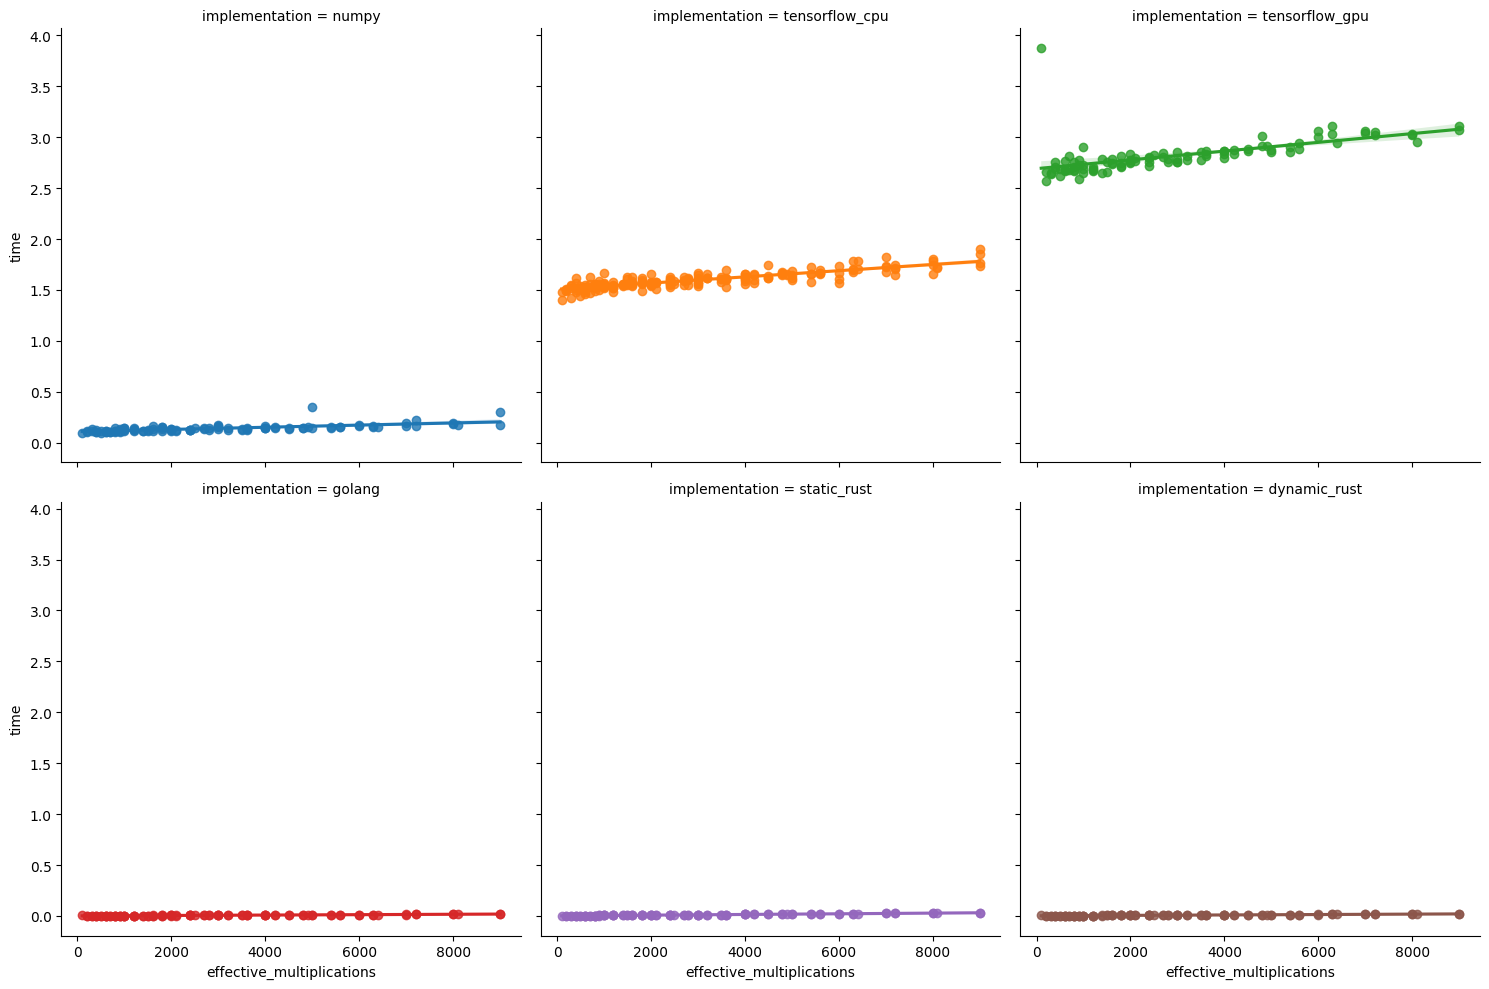

In [36]:
target_data = all_data.loc[(all_data["threads"]==1) & (all_data["batchsize"]==1) & (all_data["effective_multiplications"] < 1E4)]

sns.lmplot(data=target_data, x="effective_multiplications", y="time", col="implementation", hue="implementation", col_wrap=3)

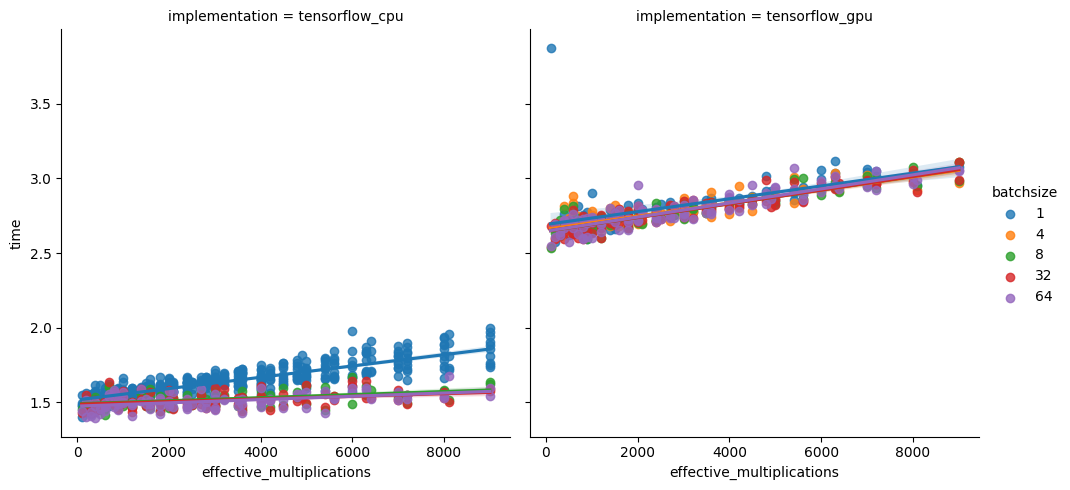

In [58]:
target_data = all_data.loc[(all_data["implementation"] == "tensorflow_cpu") | (all_data["implementation"] == "tensorflow_gpu")]
target_data = target_data.loc[(target_data["effective_multiplications"] < 1E4)]

sns.lmplot(data=target_data, x="effective_multiplications", y="time", col="implementation", hue="batchsize")

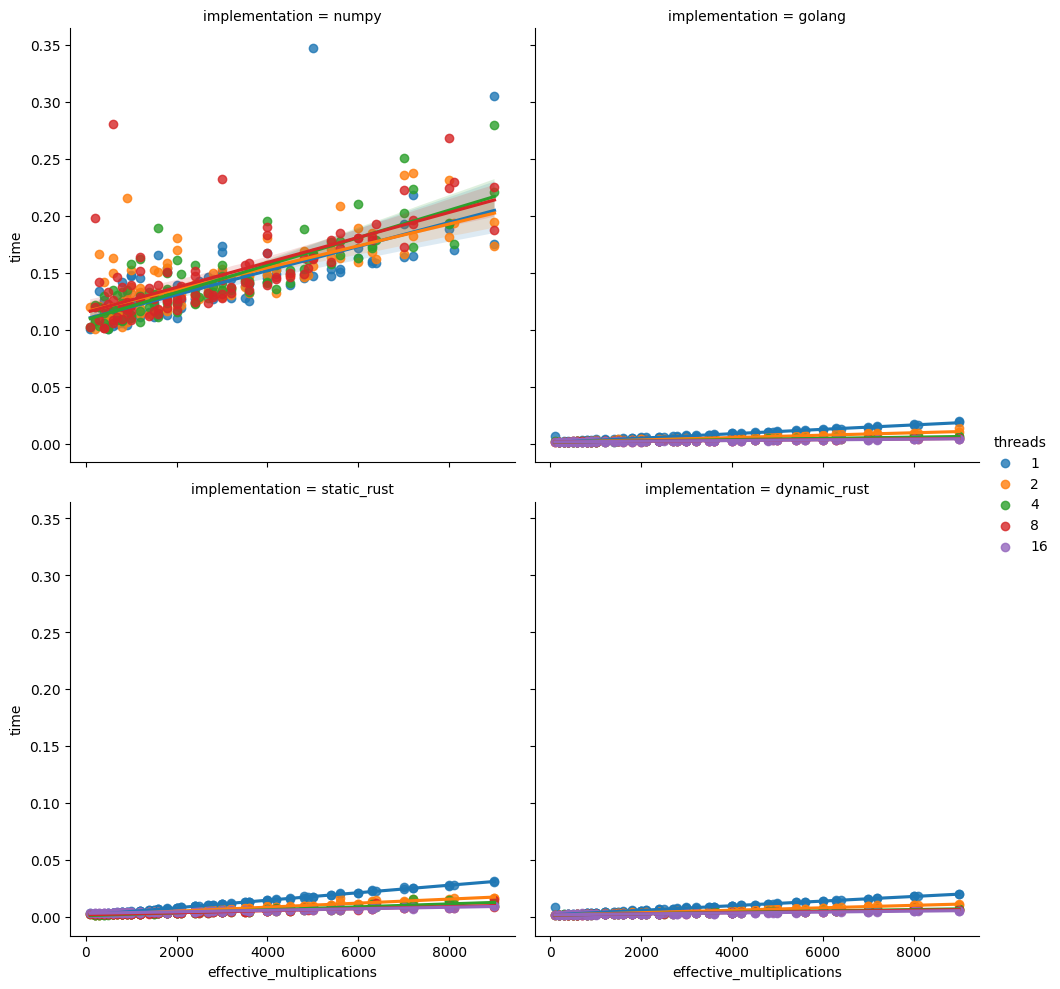

In [52]:
target_data = all_data.drop(all_data[all_data["implementation"] == "tensorflow_cpu"].index)
target_data = target_data.drop(all_data[all_data["implementation"] == "tensorflow_gpu"].index)
target_data = target_data.loc[(target_data["effective_multiplications"] < 1E4)]

sns.lmplot(data=target_data, x="effective_multiplications", y="time", col="implementation", hue="threads", col_wrap=2)

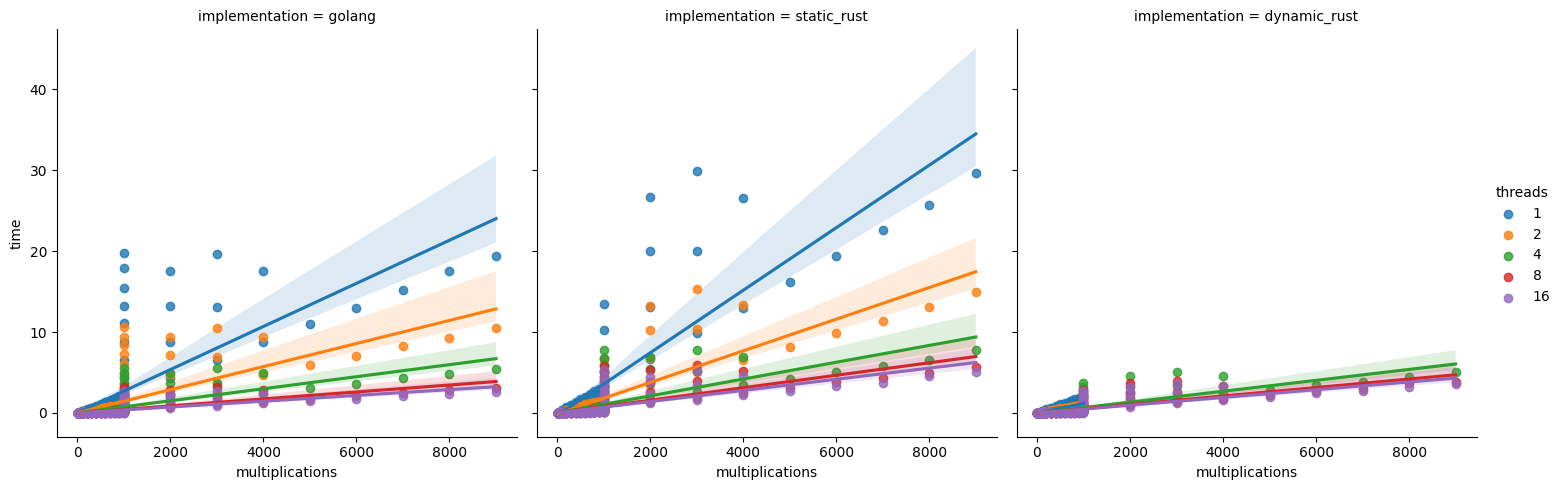

In [51]:
target_data = all_data.drop(all_data[all_data["implementation"] == "tensorflow_cpu"].index)
target_data = target_data.drop(all_data[all_data["implementation"] == "tensorflow_gpu"].index)
target_data = target_data.drop(all_data[all_data["implementation"] == "numpy"].index)
target_data = target_data.loc[(target_data["effective_multiplications"] < 1E7)]

sns.lmplot(data=target_data, x="multiplications", y="time", col="implementation", hue="threads")